In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:80% !important;}
div.prompt {min-width:70px;}
div#toc-header{margin-top:150px;}
span.toc-item-num{display:none;}
div.CodeMirror {font-family:Consolas}
div.input {font-family:Consolas}
</style>
"""))

<b><font color='red' size='6'>ch12. 데이터 프레임(2차원)과 시리즈(1차원)(Pandas)</font></b>
 - pip install pandas

# 1절. 판다스 패키지
 - 데이터 분석을 위해 반드시 알아야 할 패키지. 넘파이를 기반으로 하며, 다른 많은 라이브러리와 잘 통합되도록 설계되어 있음.
 - 1차원 구조를 갖는 시리즈, 2차원 구조를 갖는 데이터 프레임을 제공
 - 판다스 장점 : 데이터 프레임 생성, 파일io, 레이블링, 부분 데이터 추출,
               크기변경(열이나 열삽입, 삭제), 데이터 분할, 병합,
               데이터 정렬, 결측치 처리, 피벗과 언피벗에 용이함
 - https://pypi.org/project/pandas/ (package index)
 - https://pandas.pydata.org/docs/reference/index.html#api (API reference)

In [1]:
import pandas as pd
pd.__version__

'1.5.3'

In [6]:
data = pd.read_json('data/ch09_member1.json', encoding='cp949')  # encoding 기본값 : utf-8
display(data)
print(type(data))

,name,age,email,address
0,홍길동,20,h@h.com,서울
1,김길동,30,k@h.com,부산
2,신길동,40,s@h.com,안양


<class 'pandas.core.frame.DataFrame'>


In [10]:
member4 = pd.read_csv('data/ch09_member4.csv')
member4.head()  # head()매개변수X : 최초 상위 5행 가져오기

,name,age,email,address
0,홍길동,20,h@hong.com,서울
1,신길동,25,s@hong.com,부산
2,김길동,35,k@hong.com,인천


In [13]:
member1 = pd.read_csv('data/ch09_member1.csv', header=None,
                     names=['name', 'age', 'email', 'address'])  # header 열 이름 지정
member1

,name,age,email,address
0,홍길동,20,kildong@hong.com,서울시 관악구
1,김길동,40,kimdong@hong.com,서울시 영등포구
2,신길동,30,sindong@hong.com,서울시 동작구


In [14]:
iris = pd.read_hdf('data/ch09_iris2.hdf5', key='iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# 2절. 데이터 프레임 만들기
## 2.1 딕셔너리를 이용해서 데이터 프레임 만들기

In [29]:
# value가 list인 딕셔너리를 데이터프레임으로 변환
d = {'kor' : [100, 90], 'mat' : [95, 99]}
df = pd.DataFrame(data = d)
df

,kor,mat
0,100,95
1,90,99


In [30]:
# d = {'kor' : 100, 'mat' : 99} 에러
d = [{'kor' : 100, 'mat' : 99}]  # list로 감싸줘야 함
pd.DataFrame(d)

,kor,mat
0,100,99


In [31]:
df.to_dict()  # 데이터 프레임을 딕셔너리로

{'kor': {0: 100, 1: 90}, 'mat': {0: 95, 1: 99}}

In [32]:
df.to_numpy()  # 데이터 프레임을 넘파이 배열로

array([[100,  95],
       [ 90,  99]], dtype=int64)

In [42]:
# 딕셔너리 리스트를 데이터프레임으로
d = [{'kor' : 100, 'mat' : 95}, {'kor' : 90, 'mat' : 99}]
df = pd.DataFrame(data = d)
df

,kor,mat
0,100,95
1,90,99


In [43]:
df.dtypes

kor    int64
mat    int64
dtype: object

In [44]:
df.info()  # ★ 사용 빈도 높음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   kor     2 non-null      int64
 1   mat     2 non-null      int64
dtypes: int64(2)
memory usage: 160.0 bytes


In [45]:
df.dtypes.to_dict()

{'kor': dtype('int64'), 'mat': dtype('int64')}

In [46]:
df['kor']

0    100
1     90
Name: kor, dtype: int64

In [47]:
df['kor'].dtype

dtype('int64')

In [49]:
import numpy as np
df['kor'].astype(np.float64)

0    100.0
1     90.0
Name: kor, dtype: float64

In [50]:
d = [{'kor' : 100, 'mat' : 100}, {'kor' : 90, 'mat' : 99}, {'kor' : 83, 'eng' : 85}]
df = pd.DataFrame(data = d)
df
# 결측치의 타입은 숫자일 경우 float

,kor,mat,eng
0,100,100.0,NaN
1,90,99.0,NaN
2,83,NaN,85.0


In [51]:
type(np.nan)

float

In [1]:
# 결측치는 int로 형변환 불가(결측치를 대체값으로 치환 후 변환)
# df['mat'].astype(np.int32) 에러

## 2.2 리스트를 이용해서 데이터 프레임 만들기

In [53]:
kor = [100, 90, 95, 90, 65]
mat = [100, 95, 94, 64, 85]
df = pd.DataFrame({'kor' : kor, 'mat' : mat})
df

,kor,mat
0,100,100
1,90,95
2,95,94
3,90,64
4,65,85


In [55]:
np.c_[kor, mat]

array([[100, 100],
       [ 90,  95],
       [ 95,  94],
       [ 90,  64],
       [ 65,  85]])

In [59]:
df = pd.DataFrame(np.c_[kor, mat], columns=['국어', '수학'])
df

,국어,수학
0,100,100
1,90,95
2,95,94
3,90,64
4,65,85


In [62]:
l = [[100, 90], [10, 20]]  # 행으로 삽입됨
df = pd.DataFrame(l, columns=['kor', 'mat'])
df

,kor,mat
0,100,90
1,10,20


In [63]:
%ls D:\imsehyeon\Downloads\shareData\상가정보

 D 드라이브의 볼륨: 새 볼륨
 볼륨 일련 번호: EC0C-568F

 D:\imsehyeon\Downloads\shareData\상가정보 디렉터리

2024-11-18  오후 04:13    <DIR>          .
2024-11-18  오후 04:13    <DIR>          ..
2024-10-23  오후 05:58             1,011 [필독]파일열람방법.txt
2024-10-23  오후 06:19        53,454,658 소상공인시장진흥공단_상가(상권)정보_강원_202409.csv
2024-10-23  오후 06:19       301,935,950 소상공인시장진흥공단_상가(상권)정보_경기_202409.csv
2024-10-23  오후 06:20        86,291,699 소상공인시장진흥공단_상가(상권)정보_경남_202409.csv
2024-10-23  오후 06:20        70,952,897 소상공인시장진흥공단_상가(상권)정보_경북_202409.csv
2024-10-23  오후 06:20        36,458,714 소상공인시장진흥공단_상가(상권)정보_광주_202409.csv
2024-10-23  오후 06:20        57,391,847 소상공인시장진흥공단_상가(상권)정보_대구_202409.csv
2024-10-23  오후 06:20        36,638,904 소상공인시장진흥공단_상가(상권)정보_대전_202409.csv
2024-10-23  오후 06:20        78,253,942 소상공인시장진흥공단_상가(상권)정보_부산_202409.csv
2024-10-23  오후 06:18       254,255,270 소상공인시장진흥공단_상가(상권)정보_서울_202409.csv
2024-10-23  오후 06:18         8,277,492 소상공인시장진흥공단_상가(상권)정보_세종_202409.csv
2024-10-23  오후 06:18        26,299,042 소상공인시장진흥공

In [65]:
df = pd.read_csv(r'D:\imsehyeon\Downloads\shareData\상가정보\소상공인시장진흥공단_상가(상권)정보_세종_202409.csv',
                encoding='utf-8', sep=',',   # 기본값 생략가능
                low_memory=False,  # 데이터 용량이 클 경우만 기입(형식이 맞지 않을 때의 에러를 대비해서)
                nrows=30)  # (총 13,221개 중)처음 30행만 가져오기
df.shape

(30, 39)

In [68]:
df.head(1)  # head(1) 상위 1행만 출력

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084499,베트남쌀국수퍼짱,NaN,I2,음식,I205,동남아시아,I20501,베트남식 전문,I56194,...,3611010700103610086000001,모닝시티2,세종특별자치시 세종특별자치시 한누리대로 311,339003.0,30123,NaN,1.0,NaN,127.25584,36.492065


In [67]:
df.T  # 전치행렬

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
상가업소번호,MA0101202210A0084499,MA010120220805434190,MA010120220805432469,MA010120220805435562,MA010120220805437826,MA010120220805437034,MA010120220805436870,MA010120220805439448,MA010120220805447501,MA010120220805445058,...,MA010120220805444812,MA010120220805443708,MA010120220805442296,MA010120220805440526,MA010120220805443477,MA010120220805457023,MA010120220805461877,MA010120220805457615,MA010120220805459636,MA010120220805452812
상호명,베트남쌀국수퍼짱,더함인테리어컨설팅,모더니엘살롱,카이젠교육,가재세탁,세종마취과,세종유도관,세종종합법률사무소,로엘라,딥핑크,...,부동산땅집go공인중개사사무소,머슬케어필라테스,천지연가든,아르드뽀에스테틱,쿠헤어,세종하이엔드학원,캐치업세종,인성세무회계사무소,모던제이,엘리시아헤어살롱
지점명,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
상권업종대분류코드,I2,M1,S2,P1,S2,Q1,P1,M1,I2,G2,...,L1,P1,I2,S2,S2,P1,G2,M1,G2,S2
상권업종대분류명,음식,과학·기술,수리·개인,교육,수리·개인,보건의료,교육,과학·기술,음식,소매,...,부동산,교육,음식,수리·개인,수리·개인,교육,소매,과학·기술,소매,수리·개인
상권업종중분류코드,I205,M112,S207,P105,S209,Q102,P106,M103,I201,G204,...,L102,P106,I201,S207,S207,P105,G215,M104,G209,S207
상권업종중분류명,동남아시아,전문 디자인,이용·미용,일반 교육,세탁,의원,기타 교육,법무관련,한식,종합 소매,...,부동산 서비스,기타 교육,한식,이용·미용,이용·미용,일반 교육,의약·화장품 소매,회계·세무,섬유·의복·신발 소매,이용·미용
상권업종소분류코드,I20501,M11201,S20701,P10501,S20901,Q10209,P10601,M10301,I20101,G20499,...,L10203,P10603,I20101,S20702,S20701,P10501,G21503,M10401,G20911,S20701
상권업종소분류명,베트남식 전문,인테리어 디자인업,미용실,입시·교과학원,세탁소,기타 의원,태권도/무술학원,변호사,백반/한정식,그 외 기타 종합 소매업,...,부동산 중개/대리업,요가/필라테스 학원,백반/한정식,피부 관리실,미용실,입시·교과학원,화장품 소매업,공인회계사,가방 소매업,미용실
표준산업분류코드,I56194,M73201,S96112,P85501,S96912,Q86201,P85611,M71101,I56111,G47190,...,L68221,P85612,I56111,S96113,S96112,P85501,G47813,M71201,G47440,S96112


In [69]:
# 판다스 디스플레이 옵션 사용
pd.options.display.max_columns = 39  # 39열까지 display 가능
pd.options.display.max_rows = 40     # 40행까지 display 가능
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0084499,베트남쌀국수퍼짱,NaN,I2,음식,I205,동남아시아,I20501,베트남식 전문,I56194,김밥 및 기타 간이 음식점업,36,세종특별자치시,36110,세종특별자치시,36110518,나성동,3611010700,나성동,3611010700107320000,1,대지,732,NaN,세종특별자치시 세종특별자치시 나성동 732,361102000002,세종특별자치시 세종특별자치시 한누리대로,311,NaN,3611010700103610086000001,모닝시티2,세종특별자치시 세종특별자치시 한누리대로 311,339003.0,30123,NaN,1.0,NaN,127.25584,36.492065


In [70]:
df.head(1).T

,0
상가업소번호,MA0101202210A0084499
상호명,베트남쌀국수퍼짱
지점명,NaN
상권업종대분류코드,I2
상권업종대분류명,음식
상권업종중분류코드,I205
상권업종중분류명,동남아시아
상권업종소분류코드,I20501
상권업종소분류명,베트남식 전문
표준산업분류코드,I56194


## 2.3 read_csv

In [72]:
# (1) CSV 파일 불러오기(기본값)
member = pd.read_csv('data/ch12_member.csv', 
                     # encoding='utf-8', sep=',',  # 기본값 생략 가능
                    )
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,#홍길뜽,24,non@not.com,없는구,2000-01-01


In [73]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     6 non-null      object
 1   Age      6 non-null      int64 
 2   Email    6 non-null      object
 3   Address  6 non-null      object
 4   Birth    6 non-null      object
dtypes: int64(1), object(4)
memory usage: 368.0+ bytes


In [75]:
# 문자로 읽어들인 Birth를 datetime형으로 바꾸기
# 형변환은 astype()을 쓰지만 datetime형으로 변환할 때는 to_datetime()함수를 사용
member['Birth'] = pd.to_datetime(member['Birth'])
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     6 non-null      object        
 1   Age      6 non-null      int64         
 2   Email    6 non-null      object        
 3   Address  6 non-null      object        
 4   Birth    6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 368.0+ bytes


In [78]:
import numpy as np
member['Age'] = member['Age'].astype(np.int16)
member.dtypes

Name               object
Age                 int16
Email              object
Address            object
Birth      datetime64[ns]
dtype: object

In [80]:
# (2) 특정행을 제외하고 csv파일 읽어오기
member = pd.read_csv('data/ch12_membercp949.csv', encoding='cp949',
                    skiprows=[1, 6])  # 1부터 시작 : 1, 6번째 행을 제외하고 읽어오기
member

,Name,Age,Email,Address,Birth
0,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
1,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
2,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
3,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [83]:
# (3) 상위 몇 행만 csv 파일 읽어오기
member_df = pd.read_csv('data/ch12_membersep.csv', sep='|', nrows=5)  # 상위 5행만 읽어오기
member_df

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [86]:
# (4) 주석제외, datetime형 필드를 지정하여 읽어오기
member_df = pd.read_csv('data/ch12_membertab.csv', sep='\t',
                       comment='#',  # #이 있는 데이터는 제외하고 읽어오기 (주석처리)
                       parse_dates=['Birth'])  # datetime형으로 읽어올 필드 지정
member_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


## iris 데이터 가져오기 방법1 : sklearn(머신러닝 패키지)
## iris 데이터 가져오기 방법2 : statsmodels(R데이터 가져오기)
## iris 데이터 가져오기 방법3 : seaborn(시각화 패키지)

## 2.4 sklearn.datasets 모듈 데이터(iris)를 데이터 프레임으로 변환

In [87]:
from sklearn import datasets
# import sklearn.datasets as datasets
# sklearn 패키지는 머신러닝을 공부하기 위한, 학습 데이터셋들을 제공
# sklearn 패키지에서 제공되는 데이터셋들은 딕셔너리 형식으로 제공
iris = datasets.load_iris()
iris  # 딕셔너리 형태

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [89]:
print(iris.DESCR)  # iris 데이터 셋에 대한 설명

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [92]:
iris.data  # 독립변수
iris['data'][:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [93]:
iris.feature_names  # 독립변수의 열이름
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [97]:
# 데이터 프레임에서 열이름
[col[:-4].strip().replace(' ', '_') for col in iris.feature_names]
# 뒤에서 4자리 제외.앞뒤 공백 제거.' '를 '_'로 변경

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [98]:
[len(col) for col in iris.feature_names]

[17, 16, 17, 16]

In [100]:
[col[:12].strip().replace(' ', '_') for col in iris.feature_names]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [103]:
iris.target
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [104]:
iris.target_names
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [110]:
# 데이터 프레임의 가장 오른쪽 열(종속변수)
iris.target_names[iris.target]
iris['target_names'][iris['target']]

array([['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['setosa'],
       ['versicolor'],
       ['versicolor'],
    

In [113]:
# 독립변수
data = iris.data
print(data[:5])
# 종속변수
target = iris.target_names[iris.target].reshape(-1, 1)  # 맨 오른쪽 한 열로 들어가기 때문에(나머지 계산, 열1)
print(target[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[['setosa']
 ['setosa']
 ['setosa']
 ['setosa']
 ['setosa']]


In [114]:
print('독립변수 차원 : ', data.shape)
print('종속변수 차원 : ', target.shape)

독립변수 차원 :  (150, 4)
종속변수 차원 :  (150, 1)


In [115]:
np.hstack((data, target))

array([['5.1', '3.5', '1.4', '0.2', 'setosa'],
       ['4.9', '3.0', '1.4', '0.2', 'setosa'],
       ['4.7', '3.2', '1.3', '0.2', 'setosa'],
       ['4.6', '3.1', '1.5', '0.2', 'setosa'],
       ['5.0', '3.6', '1.4', '0.2', 'setosa'],
       ['5.4', '3.9', '1.7', '0.4', 'setosa'],
       ['4.6', '3.4', '1.4', '0.3', 'setosa'],
       ['5.0', '3.4', '1.5', '0.2', 'setosa'],
       ['4.4', '2.9', '1.4', '0.2', 'setosa'],
       ['4.9', '3.1', '1.5', '0.1', 'setosa'],
       ['5.4', '3.7', '1.5', '0.2', 'setosa'],
       ['4.8', '3.4', '1.6', '0.2', 'setosa'],
       ['4.8', '3.0', '1.4', '0.1', 'setosa'],
       ['4.3', '3.0', '1.1', '0.1', 'setosa'],
       ['5.8', '4.0', '1.2', '0.2', 'setosa'],
       ['5.7', '4.4', '1.5', '0.4', 'setosa'],
       ['5.4', '3.9', '1.3', '0.4', 'setosa'],
       ['5.1', '3.5', '1.4', '0.3', 'setosa'],
       ['5.7', '3.8', '1.7', '0.3', 'setosa'],
       ['5.1', '3.8', '1.5', '0.3', 'setosa'],
       ['5.4', '3.4', '1.7', '0.2', 'setosa'],
       ['5.1'

In [119]:
# ⓐ 독립변수와 종속변수를 stack한 후, 데이터프레임으로 완성
pd.DataFrame(np.hstack((data, target)), 
             columns=[col[:12].strip().replace(' ', '_') for col in iris.feature_names]+
                      ['spacies'])

,sepal_length,sepal_width,petal_length,petal_width,spacies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [122]:
df = pd.DataFrame(np.hstack((data, target)), 
             columns=iris.feature_names + ['spacies'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),spacies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [124]:
df.spacies  # df['spacies']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: spacies, Length: 150, dtype: object

In [125]:
df['sepal length (cm)']
# df.sepal length (cm) 에러 : 열 이름에 space나 특수문자의 경우 . 열접근이 불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: object

In [127]:
# ⓑ 독립변수,종속변수를 따로 데이터프레임을 만들어 두 데이터프레임을 연결
# X : 독립변수 데이터프레임
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2


In [128]:
X.columns = [col[:12].strip().replace(' ', '_') for col in iris.feature_names]

In [129]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [130]:
X.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [131]:
# y : 종속변수 데이터프레임
y = pd.DataFrame(iris.target_names[iris.target], columns=['spacies'])
y

,spacies
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [133]:
print(X.index)  # index : 행 이름
print(y.index)

RangeIndex(start=0, stop=150, step=1)
RangeIndex(start=0, stop=150, step=1)


In [135]:
# 데이터프레임 연결하기 (열로 연결)
iris_df = pd.concat( [X, y], axis=1)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,spacies
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [136]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   spacies       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 2.5 statsmodels 패키지의 iris

In [3]:
# iris 데이터 가져오기 방법2 : R 데이터 가져오기
import statsmodels.api as sm
iris_data = sm.datasets.get_rdataset('iris',
                                    package='datasets',
                                    cache=True)
iris_data

<class 'statsmodels.datasets.utils.Dataset'>

In [4]:
iris = iris_data.data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris['Sepal.Length']
# iris.Sepal.Length  # 에러 : 열 이름에 .이 있으면 iris.Sepal.Length로 접근 불가

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: Sepal.Length, Length: 150, dtype: float64

In [144]:
[col.lower().replace('.', '_') for col in iris.columns]

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [145]:
iris.columns = [col.replace('.', '') for col in iris.columns]
iris.head(1)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa


## 2.6 seaborn 패키지의 iris

In [146]:
# iris 데이터 가져오기 방법3 : seaborn
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [148]:
# 데이터 프레임을 파일로 출력하기
iris.to_csv('data/ch12_iris.csv',  # 4k
           sep=',', mode='w', encoding='utf-8',  # 기본값 생략 가능
           index=False)  # 행 이름이 생략돼서 파일 출력

In [149]:
iris.to_csv('data/ch12_iris.csv.gz',  # 1k
           index=False,
           compression='infer')

In [150]:
read_iris = pd.read_csv('data/ch12_iris.csv.gz', compression='infer')
read_iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


# 3절. 이름(열, 행) 지정하기
## 3.1 열이름 지정하기

In [152]:
member = pd.read_csv('data/ch12_member.csv', comment='#')  # '#' 제외하고(주석처리)
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [153]:
member.columns

Index(['Name', 'Age', 'Email', 'Address', 'Birth'], dtype='object')

In [155]:
member.columns = ['이름', '나이', '메일', '주소', '생년월일']
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 3.2 행이름 지정하기

In [156]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [157]:
member.index = range(10, 15)
member

,이름,나이,메일,주소,생년월일
10,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
11,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
12,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
13,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
14,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [158]:
member.index = ['동', '서', '남', '북', '중']
member

,이름,나이,메일,주소,생년월일
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [161]:
member['이름']['서']

'홍길서'

In [162]:
member.loc['서', '이름']  # log : 행이름과 열이름으로 데이터 프레임의 부분 데이터 조회

'홍길서'

In [164]:
# 이름을 행이름으로 (실행결과가 출력돼서 나오면 return될 뿐, member는 바뀌지 않음)
# member를 수정하려면 (1) 할당 (2) inplace 매개변수에 True
member1 = member.set_index('이름')
member1

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [166]:
member.set_index('이름', inplace=True)

In [167]:
member

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [168]:
member.index

Index(['홍길동', '홍길서', '홍길남', '홍길북', '홍길중'], dtype='object', name='이름')

In [169]:
# 인덱스를 컬럼에 편입시키기
member.reset_index()

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [170]:
member

,나이,메일,주소,생년월일
이름,,,,
홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
홍길서,30,seo@hong.com,서울시 중구,1999-12-01
홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [171]:
member.reset_index(inplace=True)

In [172]:
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [175]:
member.index = [0, 11, 3, 4, 5]
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
11,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
3,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
4,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
5,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [177]:
# 기존 index를 새로운 열에 편입시키지 않고, 완전히 제거 후 숫자 index로 초기화
member.reset_index(drop=True, inplace=True)
member

,이름,나이,메일,주소,생년월일
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [179]:
member.loc[2, '생년월일']

'1999-11-01'

In [180]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   이름      5 non-null      object
 1   나이      5 non-null      int64 
 2   메일      5 non-null      object
 3   주소      5 non-null      object
 4   생년월일    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [181]:
member = pd.read_csv('data/ch12_member.csv', comment='#', parse_dates=['Birth'])
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 328.0+ bytes


In [184]:
member.loc[0, 'Birth']

Timestamp('1999-01-01 00:00:00')

In [186]:
# 시리즈.dt : datetime열에서 날짜 및 시간에 관련된 정보를 추출하기 위해 사용
member['Birth'].dt.year

0    1999
1    1999
2    1999
3    1999
4    1999
Name: Birth, dtype: int64

In [187]:
member['Birth'].dt.month

0     1
1    12
2    11
3     5
4     1
Name: Birth, dtype: int64

In [188]:
member['Birth'].dt.day

0     1
1     1
2     1
3     1
4    30
Name: Birth, dtype: int64

In [189]:
member['Birth'].dt.weekday  # 0월, 1화, ... 6일

0    4
1    2
2    0
3    5
4    5
Name: Birth, dtype: int64

In [190]:
member['Birth'].dt.to_period('M')  # M(월)까지 출력

0    1999-01
1    1999-12
2    1999-11
3    1999-05
4    1999-01
Name: Birth, dtype: period[M]

## 3.3 레벨 이름 지정하기

In [191]:
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [192]:
member.columns

Index(['Name', 'Age', 'Email', 'Address', 'Birth'], dtype='object')

In [193]:
member.columns = [['기본정보', '기본정보', '기본정보', '추가정보', '추가정보'],
                  ['이름', '나이', '메일', '주소', '생일']]
member.columns.names = ['대분류', '소분류']
member

대분류 기본정보                        추가정보           
소분류   이름  나이             메일       주소         생일
0    홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
1    홍길서  30   seo@hong.com   서울시 중구 1999-12-01
2    홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
3    홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
4    홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [194]:
member.index

RangeIndex(start=0, stop=5, step=1)

In [195]:
member.index = [['좌우', '좌우', '상하', '상하', '상하'],
                ['동', '서', '남', '북', '중']]
member

대분류  기본정보                        추가정보           
소분류    이름  나이             메일       주소         생일
좌우 동  홍길동  20  hong@hong.com  서울시 강동구 1999-01-01
   서  홍길서  30   seo@hong.com   서울시 중구 1999-12-01
상하 남  홍길남  21   nam@hong.com  서울시 강동구 1999-11-01
   북  홍길북  22   buk@hong.com  서울시 관악구 1999-05-01
   중  홍길중  23   mid@hong.com   부산시 중구 1999-01-30

In [199]:
member.loc['좌우', '기본정보']['나이']

동    20
서    30
Name: 나이, dtype: int64

In [201]:
member.loc['좌우', '기본정보'].loc['동', '나이']

20

In [3]:
import pandas as pd
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [5]:
iris.columns = ['꽃받침길이', '꽃받침너비', '꽃잎길이', '꽃잎너비', '종']
iris.tail(1)  # 끝 1행

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
149,5.9,3.0,5.1,1.8,virginica


In [7]:
iris.index = range(150, 300)
iris.tail()

,꽃받침길이,꽃받침너비,꽃잎길이,꽃잎너비,종
295,6.7,3.0,5.2,2.3,virginica
296,6.3,2.5,5.0,1.9,virginica
297,6.5,3.0,5.2,2.0,virginica
298,6.2,3.4,5.4,2.3,virginica
299,5.9,3.0,5.1,1.8,virginica


In [16]:
iris.columns = [['꽃받침', '꽃받침', '꽃잎', '꽃잎', '종'],
                ['길이', '너비', '길이', '너비', '종']]
iris.columns.names = ['sps', '길이너비']
iris.loc[[150, 200, 250]]

sps   꽃받침        꽃잎                종
길이너비   길이   너비   길이   너비           종
150   5.1  3.5  1.4  0.2      setosa
200   7.0  3.2  4.7  1.4  versicolor
250   6.3  3.3  6.0  2.5   virginica

In [11]:
display(iris)

sps   꽃받침        꽃잎               종
길이너비   길이   너비   길이   너비          종
150   5.1  3.5  1.4  0.2     setosa
151   4.9  3.0  1.4  0.2     setosa
152   4.7  3.2  1.3  0.2     setosa
153   4.6  3.1  1.5  0.2     setosa
154   5.0  3.6  1.4  0.2     setosa
..    ...  ...  ...  ...        ...
295   6.7  3.0  5.2  2.3  virginica
296   6.3  2.5  5.0  1.9  virginica
297   6.5  3.0  5.2  2.0  virginica
298   6.2  3.4  5.4  2.3  virginica
299   5.9  3.0  5.1  1.8  virginica

[150 rows x 5 columns]

In [12]:
pd.options.display.max_rows = 150  # 커널 재시작 시 원상 복귀(전체 다 보기)

In [17]:
# setosa 50개, versicolor 50개, virginica 50개
# ['setosa']*50 + ['versicolor']*50 + ['virginica']*50
print(['setosa' for i in range(50)] + ['versicolor' for i in range(50)] + ['virginica' for i in range(50)])

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicol

In [19]:
iris.index = [['setosa' for i in range(50)] + 
              ['versicolor' for i in range(50)] + 
              ['virginica' for i in range(50)],  # 1차원
              list(range(50)) + list(range(50)) + list(range(50))]  # 2차원
iris.iloc[[0, 25, 50, 75, 100, 125]]  # iloc : 행 번호로 접근

sps            꽃받침        꽃잎                종
길이너비            길이   너비   길이   너비           종
setosa     0   5.1  3.5  1.4  0.2      setosa
           25  5.0  3.0  1.6  0.2      setosa
versicolor 0   7.0  3.2  4.7  1.4  versicolor
           25  6.6  3.0  4.4  1.4  versicolor
virginica  0   6.3  3.3  6.0  2.5   virginica
           25  7.2  3.2  6.0  1.8   virginica

In [20]:
# 피벗테이블 이용 시 피벗팅한 결과를 가져올 때 볼 수 있음

# 4절. 부분 데이터 조회

In [21]:
member = pd.read_csv('data/ch12_member.csv', comment='#', parse_dates=['Birth'])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 4.1 단일 열 조회

In [23]:
member['Name']
member.Name

0    홍길동
1    홍길서
2    홍길남
3    홍길북
4    홍길중
Name: Name, dtype: object

In [25]:
# member[0] # 행을 조회할 경우 에러 : 데이터프레임의[]는 열이름이어야 함

## 4.2 loc을 이용한 조회
 - df.loc[행이름, 열이름] : 행이름, 열이름으로 조회. 
             * 행이름과 열이름 자리에 슬라이싱(from:to)은 from부터 to까지 (from, to 포함)
             * 행이름과 열이름 자리에 list

In [27]:
member.loc[0:2]  # member.loc[0:2, ], member.loc[0:2, :] - 2행 포함 (모든 열을 다 출력할 경우 열자리 생략 가능)

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [29]:
member.index = ['동', '서', '남', '북', '중']
# member.loc[0:2]  # 불가능해짐
member.loc['동':'남']

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [30]:
# 동 ~ 남 행까지, Name ~ Email 열까지
member.loc['동':'남', 'Name':'Email']

,Name,Age,Email
동,홍길동,20,hong@hong.com
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com


In [31]:
# 동행과 남행만
# member['동', 'Name'] 에러
member.loc[['동', '남']]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [34]:
# 동행과 남행만, Name열과 Email열만
member.loc[['동', '남'], ['Name', 'Email']]

,Name,Email
동,홍길동,hong@hong.com
남,홍길남,nam@hong.com


In [36]:
member.loc['동', 'Name'], type(member.loc['동', 'Name'])

('홍길동', str)

In [38]:
member.loc['동'], type(member.loc['동'])  # 한 행의 결과는 1차원 시리즈

(Name                       홍길동
 Age                         20
 Email            hong@hong.com
 Address                서울시 강동구
 Birth      1999-01-01 00:00:00
 Name: 동, dtype: object,
 pandas.core.series.Series)

In [41]:
member.loc[:, 'Name']

동    홍길동
서    홍길서
남    홍길남
북    홍길북
중    홍길중
Name: Name, dtype: object

In [44]:
# member.loc['Name'] 에러 : 행 이름 생략 불가
member['Name'], type(member['Name'])

(동    홍길동
 서    홍길서
 남    홍길남
 북    홍길북
 중    홍길중
 Name: Name, dtype: object,
 pandas.core.series.Series)

## 4.3 iloc을 이용한 조회
 - df.iloc[행번호, 열번호]
     * 열번호 생략 시 모든 열 조회
     * 행번호, 열번호 자리에 list, 슬라이싱 [from:stop:by] : from부터 stop앞 까지 by씩

In [45]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [46]:
# 2번째 ~ 3번째 행 (열번호 생략 시 모든 열 출력)
member.iloc[2:4]

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [47]:
member.iloc[0]  # 1차원 시리즈

Name                       홍길동
Age                         20
Email            hong@hong.com
Address                서울시 강동구
Birth      1999-01-01 00:00:00
Name: 동, dtype: object

In [48]:
member.iloc[0, 0]

'홍길동'

In [50]:
# 0번째 ~ 2번째 행, 1번째 ~ 3번째 열 출력
member.iloc[:3, 1:4]

,Age,Email,Address
동,20,hong@hong.com,서울시 강동구
서,30,seo@hong.com,서울시 중구
남,21,nam@hong.com,서울시 강동구


In [54]:
# 짝수 번째 행의 맨 마지막 열을 제외하고 출력
member.iloc[::2, :-1]

,Name,Age,Email,Address
동,홍길동,20,hong@hong.com,서울시 강동구
남,홍길남,21,nam@hong.com,서울시 강동구
중,홍길중,23,mid@hong.com,부산시 중구


In [55]:
# 마지막 행 부터 처음 행 까지 거꾸로 출력
member.iloc[::-1]

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [56]:
# 0번째와 2번째 행, 1번째와 3번째 열만 출력
member.iloc[[0, 2], [1, 3]]

,Age,Address
동,20,서울시 강동구
남,21,서울시 강동구


In [57]:
# 0번째 행의 0번째, 3번째 열만 출력
member.iloc[0, [0, 3]]

Name           홍길동
Address    서울시 강동구
Name: 동, dtype: object

## 4.4 조건으로 조회하기

In [58]:
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [59]:
member['Age'] >= 23

동    False
서     True
남    False
북    False
중     True
Name: Age, dtype: bool

In [102]:
member.loc[[True, False, False, False, False], ]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01


In [63]:
# 23세 이상의 데이터만 조회 (아래는 모두 동일한 결과를 출력함)
member.loc[member['Age'] >= 23]
member.loc[member['Age'] >= 23, :]
# 행의 조건식에서는 .loc 생략 가능
member[member['Age'] >= 23]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [64]:
# 23세 이상의 Name, Age, Email만 출력
member.loc[member['Age'] >= 23, 'Name':'Email']

,Name,Age,Email
서,홍길서,30,seo@hong.com
중,홍길중,23,mid@hong.com


In [65]:
# 23세 이상의 Name, Age, Address만 출력
member.loc[member['Age'] >= 23, ['Name', 'Age', 'Address']]

,Name,Age,Address
서,홍길서,30,서울시 중구
중,홍길중,23,부산시 중구


In [67]:
member['Address']

동    서울시 강동구
서     서울시 중구
남    서울시 강동구
북    서울시 관악구
중     부산시 중구
Name: Address, dtype: object

In [69]:
# 반대 : ~
member[~(member['Age'] >= 23)]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [73]:
address = '서울시 관악구'
print(address.find('중구'))
print(address.startswith('서울시'))

-1
True


In [74]:
# member['Address'].find('중구')  # 에러 : find함수는 문자열 함수라서 불가
# member['Address'].startswith('서울시')  # 에러

**※ 시리즈에 문자함수를 쓰기 위한 참조 :
https://pandas.pydata.org/pandas-docs/stable/reference/series.html#string-handling**

In [76]:
member['Address'].str.find('중구') != -1

동    False
서     True
남    False
북    False
중     True
Name: Address, dtype: bool

In [80]:
# Address가 중구를 포함하는 데이터만 출력
member[member['Address'].str.find('중구') != -1]
member.loc[member['Address'].str.find('중구') != -1]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [82]:
member[member['Address'].str.contains('중구')]
member.loc[member['Address'].str.contains('중구')]

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [83]:
# 중구 데이터의 Name, Address, Birth만 출력
member.loc[member['Address'].str.contains('중구'), ['Name', 'Address', 'Birth']]

,Name,Address,Birth
서,홍길서,서울시 중구,1999-12-01
중,홍길중,부산시 중구,1999-01-30


In [85]:
# Address가 서울로 시작하는 데이터만 출력
member[member['Address'].str.startswith('서울')]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01


In [86]:
# Address가 서울로 시작하지 않는 데이터만 출력
member[~member['Address'].str.startswith('서울')]  # 연산자가 있으면 ~()해야 함

,Name,Age,Email,Address,Birth
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [92]:
# 이름이 '홍길동'이거나 '홍길남'인 데이터 모든 열 출력
member[member['Name'].isin(['홍길동', '홍길남'])]
member.loc[member['Name'].isin(['홍길동', '홍길남'])]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [96]:
# 이름이 '홍길동'이거나 '홍길남'인 데이터 Address, Birth 열 출력
member.loc[member['Name'].isin(['홍길동', '홍길남']), 'Address':'Birth']

,Address,Birth
동,서울시 강동구,1999-01-01
남,서울시 강동구,1999-11-01


In [100]:
# 1월이 생일인 데이터 출력
member.loc[member['Birth'].dt.month == 1]
member[member['Birth'].dt.month == 1]

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [103]:
member.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 동 to 중
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Name     5 non-null      object        
 1   Age      5 non-null      int64         
 2   Email    5 non-null      object        
 3   Address  5 non-null      object        
 4   Birth    5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 412.0+ bytes


In [121]:
import numpy as np
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.loc[[0, 3], 'Email'] = np.nan
member

,Name,Age,Email,Address,Birth
0,홍길동,20,NaN,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,NaN,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [122]:
# member[member['Birth'].dt.month == 1] 에러
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     5 non-null      object
 1   Age      5 non-null      int64 
 2   Email    3 non-null      object
 3   Address  5 non-null      object
 4   Birth    5 non-null      object
dtypes: int64(1), object(4)
memory usage: 328.0+ bytes


In [123]:
member.isna()  # 결측치인지 여부

,Name,Age,Email,Address,Birth
0,False,False,True,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,True,False,False
4,False,False,False,False,False


In [126]:
True + True, False + False, False + True

(2, 0, 1)

In [127]:
member.isna().sum()  # 각 열의 결측치 갯수

Name       0
Age        0
Email      2
Address    0
Birth      0
dtype: int64

In [138]:
# 조건 연산자를 이용해서 데이터 추출(조건2개)
data = pd.DataFrame({'eng' : [100, 80, 90], 'mat' : [100, 90, 60]})
data
# 영어가 80이상이고 수학이 80이상인 데이터 추출
data[ (data['eng'] >= 80) & (data['mat'] >= 80) ]

,eng,mat
0,100,100
1,80,90


## 부분데이터 조회하는 방법
 - df[열이름] : 특정 열 모든 행
 - df[조건]   : 조건에 맞는 행 전체
 - df.loc[행이름, 열이름]  : 이름으로 조회, 조건으로 조회 가능
     * 열이름 생략 시 모든 열
     * 행이름과 열이름 자리에 list, 슬라이싱 가능
 - df.iloc[행번호, 열번호] : 번호로 조회
     * 열번호 생략 시 모든 열
     * 행번호, 열번호 자리에 list, 슬라이싱 가능

In [141]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.sample(1)

,sepal_length,sepal_width,petal_length,petal_width,species
143,6.8,3.2,5.9,2.3,virginica


In [270]:
# 1. sepal_length 열만 출력
iris['sepal_length'], iris.sepal_length

(0      5.1
 1      4.9
 2      4.7
 3      4.6
 4      5.0
 5      5.4
 6      4.6
 7      5.0
 8      4.4
 9      4.9
 10     5.4
 11     4.8
 12     4.8
 13     4.3
 14     5.8
 15     5.7
 16     5.4
 17     5.1
 18     5.7
 19     5.1
 20     5.4
 21     5.1
 22     4.6
 23     5.1
 24     4.8
 25     5.0
 26     5.0
 27     5.2
 28     5.2
 29     4.7
 30     4.8
 31     5.4
 32     5.2
 33     5.5
 34     4.9
 35     5.0
 36     5.5
 37     4.9
 38     4.4
 39     5.1
 40     5.0
 41     4.5
 42     4.4
 43     5.0
 44     5.1
 45     4.8
 46     5.1
 47     4.6
 48     5.3
 49     5.0
 50     7.0
 51     6.4
 52     6.9
 53     5.5
 54     6.5
 55     5.7
 56     6.3
 57     4.9
 58     6.6
 59     5.2
 60     5.0
 61     5.9
 62     6.0
 63     6.1
 64     5.6
 65     6.7
 66     5.6
 67     5.8
 68     6.2
 69     5.6
 70     5.9
 71     6.1
 72     6.3
 73     6.1
 74     6.4
 75     6.6
 76     6.8
 77     6.7
 78     6.0
 79     5.7
 80     5.5
 81     5.5
 82     5.8
 83 

In [259]:
# 2. 0 ~ 10행 까지 마지막 열을 제외한 데이터 출력 (loc, iloc 이용)
iris.loc[0:10, 'sepal_length' : 'petal_width']
iris.iloc[0:11, :-1]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [271]:
# 3. 3 ~ 10행 중 'sepal_length'와 'petal_length'열만 출력
iris.loc[3:10, ['sepal_length', 'petal_length']]
iris.iloc[3:11, [0, 2] ]  

,sepal_length,petal_length
3,4.6,1.5
4,5.0,1.4
5,5.4,1.7
6,4.6,1.4
7,5.0,1.5
8,4.4,1.4
9,4.9,1.5
10,5.4,1.5


In [265]:
# 4. 0번째, 50번째, 100번째 행의 모든 열 (loc, iloc)
iris.loc[[0, 50, 100]]
iris.iloc[0:101:50]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
100,6.3,3.3,6.0,2.5,virginica


In [272]:
# 5. 0번째, 25번째, 50번째, 75번째, 100번째, 125번째 행의 'petal_length'와 'petal_width'열 출력 (loc, iloc 이용)
iris.loc[[0, 25, 50, 70, 100, 125], ['petal_length','petal_width']]
iris.loc[[0, 25, 50, 75, 100, 125], 'petal_length' : 'petal_width']
iris.iloc[::25, 2:-1]
iris.iloc[::25, 2:9]

,petal_length,petal_width,species
0,1.4,0.2,setosa
25,1.6,0.2,setosa
50,4.7,1.4,versicolor
75,4.4,1.4,versicolor
100,6.0,2.5,virginica
125,6.0,1.8,virginica


In [273]:
# 6. 'species'가 'versicolor'인 데이터의 모든 열 출력
iris[iris['species'] == 'versicolor']
iris.loc[iris['species'] == 'versicolor']
iris.loc[iris['species'].str.contains('versicolor')]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
55,5.7,2.8,4.5,1.3,versicolor
56,6.3,3.3,4.7,1.6,versicolor
57,4.9,2.4,3.3,1.0,versicolor
58,6.6,2.9,4.6,1.3,versicolor
59,5.2,2.7,3.9,1.4,versicolor


In [275]:
# 7. 'species'가 'setosa'인 데이터 최초 5개 행만 출력
iris[iris['species'] == 'setosa'].head()
iris.loc[iris['species'] == 'setosa'].head()
# iris.loc[iris['species'] == 'setosa'].iloc[:5]
iris.loc[iris['species'].str.contains('setosa')].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [209]:
# 8. 'sepal_length'가 6.5 이상인 데이터 최초 5개 행만 출력
iris[iris['sepal_length'] >= 6.5].head()
iris.loc[iris['sepal_length'] >= 6.5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
54,6.5,2.8,4.6,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor


In [268]:
# 9. 'sepal_length'가 7.2 이상인 데이터의 'sepal_length'와 'sepal_width'와 'petal_length' 열만 출력
iris.loc[iris['sepal_length'] >= 7.2, ['sepal_length', 'sepal_width', 'petal_length']]
iris.loc[iris['sepal_length'] >= 7.2, 'sepal_length':'petal_length']
iris[iris['sepal_length'] >= 7.2][['sepal_length','sepal_width','petal_length']]

,sepal_length,sepal_width,petal_length
105,7.6,3.0,6.6
107,7.3,2.9,6.3
109,7.2,3.6,6.1
117,7.7,3.8,6.7
118,7.7,2.6,6.9
122,7.7,2.8,6.7
125,7.2,3.2,6.0
129,7.2,3.0,5.8
130,7.4,2.8,6.1
131,7.9,3.8,6.4


In [249]:
# 10. 'species'가 'versicolor'인 데이터 중 'sepal_length'가 6.5보다 큰 데이터의 모든 열 출력
iris.loc[(iris['species'] == 'versicolor') & (iris['sepal_length'] > 6.5)]
iris.loc[(iris['species'].str.contains('versicolor')) & (iris['sepal_length'] > 6.5)]
import numpy as np
iris[np.logical_and(iris['species'] == 'versicolor', iris['sepal_length'] > 6.5 )]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor


# 5절. 데이터 추가 및 삭제

## 5.1 데이터 프레임의 요소 삭제
 - df.drop(label, axis) : axis=0 행삭제, axis=1 열삭제
     * label : 행이름 또는 열이름

In [287]:
# member = pd.read_csv('data/ch12_member.csv', comment='#')
# 삭제 두 번 실행 시 다시 읽어들이기

In [277]:
member.index = ['동', '서', '남', '북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,NaN,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,NaN,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [281]:
# 1) 단일행 삭제
member.drop('동')  # axis=0(기본값)이면 행이름을 찾아 삭제한 결과를 반환(원본은 변하지 않음)
                   # 삭제한 결과를 member에 적용 ⓐ 할당 member = member.drop('동')
                   #                          ⓑ inplace=True 추가

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,NaN,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


In [283]:
member.drop('동', inplace=True)

In [285]:
# member.drop('동')  # 위를 실행시켜 없는 행이름을 삭제할 경우 에러

In [288]:
# 2) 복수행 삭제
member.drop(['북', '중'])

,Name,Age,Email,Address,Birth
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01


In [291]:
# 3) 열 삭제
member.drop(labels=['Address', 'Birth'], axis=1)  # 해당 열을 삭제한 결과를 return

,Name,Age,Email
서,홍길서,30,seo@hong.com
남,홍길남,21,nam@hong.com
북,홍길북,22,NaN
중,홍길중,23,mid@hong.com


## 5.2 데이터 프레임의 요소 추가

In [295]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
# 1) 리스트를 이용한 열 추가
member['favorite_no'] = 7  # 추가할 대는 member.favorite_no 불가
member

,Name,Age,Email,Address,Birth,favorite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,7
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [294]:
member.Name, member['Name']

(0    홍길동
 1    홍길서
 2    홍길남
 3    홍길북
 4    홍길중
 Name: Name, dtype: object,
 0    홍길동
 1    홍길서
 2    홍길남
 3    홍길북
 4    홍길중
 Name: Name, dtype: object)

In [296]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5 non-null      object
 1   Age          5 non-null      int64 
 2   Email        5 non-null      object
 3   Address      5 non-null      object
 4   Birth        5 non-null      object
 5   favorite_no  5 non-null      int64 
dtypes: int64(2), object(4)
memory usage: 368.0+ bytes


In [297]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
# list로 숫자와 함께 결측치 None을 입력할 시에는 type이 float로 
member['favorite_no'] = [7, 7, 7, None, 3]
member

,Name,Age,Email,Address,Birth,favorite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,3.0


In [298]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5 non-null      object 
 1   Age          5 non-null      int64  
 2   Email        5 non-null      object 
 3   Address      5 non-null      object 
 4   Birth        5 non-null      object 
 5   favorite_no  4 non-null      float64
dtypes: float64(1), int64(1), object(4)
memory usage: 368.0+ bytes


In [300]:
member['favorite_no'] = None  # None 그대로 저장
# [7, None, 7, None, 7]를 입력할 경우 None은 NaN이 되고, type은 float
member.loc[::2, 'favorite_no'] = 7  # 7은 정수값 그대로 저장
member

,Name,Age,Email,Address,Birth,favorite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,None
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,None
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,7


In [301]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         5 non-null      object
 1   Age          5 non-null      int64 
 2   Email        5 non-null      object
 3   Address      5 non-null      object
 4   Birth        5 non-null      object
 5   favorite_no  3 non-null      object
dtypes: int64(1), object(5)
memory usage: 368.0+ bytes


In [302]:
# 2) 시리즈를 이용한 열 추가
member = pd.read_csv('data/ch12_member.csv', comment='#')
member['favorite_no'] = pd.Series([7, 7, 7])  # 데이터 갯수가 부족
# 입력되지 못한 부분은 자동으로 NaN(결측치) => NaN이 포함된 열의 타입은 float
member

,Name,Age,Email,Address,Birth,favorite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,7.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,7.0
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,7.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,NaN
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [303]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
member['favorite_no'] = pd.Series([1, 2, 3], index=[0, 2, 3])  # index= : 행이름
member

,Name,Age,Email,Address,Birth,favorite_no
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01,1.0
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01,NaN
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01,2.0
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01,3.0
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30,NaN


In [307]:
# 3) 딕셔너리로 행추가
member = pd.read_csv('data/ch12_member.csv', comment='#')
new_member = {
    'Name' : '홍길숙',
    'Age' : 25,
    'Email' : 'suk@su.com',
    'Address' : '안양',
    'Birth' : '2020-12-12'
}
member = member.append(new_member, ignore_index=True)

C:\Users\4545\AppData\Local\Temp\ipykernel_10836\3436024599.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  member.append(new_member, ignore_index=True)


,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,홍길숙,25,suk@su.com,안양,2020-12-12


In [309]:
new_member = pd.DataFrame([new_member])
new_member

,Name,Age,Email,Address,Birth
0,홍길숙,25,suk@su.com,안양,2020-12-12


In [310]:
# 행 추가 시 concat (데이터 프레임들끼리 연결)
member = pd.concat( [member, new_member])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
0,홍길숙,25,suk@su.com,안양,2020-12-12


In [312]:
# 4) 시리즈를 이용한 데이터 행 추가
new_series = pd.Series(['박이름', 30, 'park@park.com', '인천', '2000-12-12'],
                      index=member.columns)
new_series

Name                 박이름
Age                   30
Email      park@park.com
Address               인천
Birth         2000-12-12
dtype: object

In [313]:
member = member.append(new_series, ignore_index=True)

C:\Users\4545\AppData\Local\Temp\ipykernel_10836\600359928.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  member = member.append(new_series, ignore_index=True)


In [315]:
member.tail(3)

,Name,Age,Email,Address,Birth
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,홍길숙,25,suk@su.com,안양,2020-12-12
6,박이름,30,park@park.com,인천,2000-12-12


In [321]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
new_series = pd.Series(['박이름', 30, 'park@park.com', '인천', '2000-12-12'],
                      index=member.columns)
pd.DataFrame(new_series).T

,Name,Age,Email,Address,Birth
0,박이름,30,park@park.com,인천,2000-12-12


In [322]:
member = pd.concat([member, pd.DataFrame(new_series).T])
member

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
0,박이름,30,park@park.com,인천,2000-12-12


In [325]:
# member.index = range(len(member))
member.reset_index(drop=True)  # 기존의 index를 drop하고 새로운 연속된 index 초기화

,Name,Age,Email,Address,Birth
0,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
1,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
2,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
3,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
4,홍길중,23,mid@hong.com,부산시 중구,1999-01-30
5,박이름,30,park@park.com,인천,2000-12-12


# 6절. 병합과 연결
## 6.1 merge()를 이용한 데이터 프레임 병합

In [333]:
df1 = pd.DataFrame( {'key' : ['a', 'b', 'c', 'd'],
                    'c1' : [1, 2, 3, 4]})
df2 = pd.DataFrame( {'key' : ['a', 'b', 'c', 'f'],
                    'c2' : [5, 6, 7, 8]})
# display(df1)
# display(df2)

,key,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key,c2
0,a,5
1,b,6
2,c,7
3,f,8


In [330]:
df1.merge(df2, how='inner')  # how='inner'(기본값) : 내부조인(내부병합)

,key,c1,c2
0,a,1,5
1,b,2,6
2,c,3,7


In [331]:
df1.merge(df2, how='left')  # how='left' : 왼쪽 데이터 프레임의 값까지 병합

,key,c1,c2
0,a,1,5.0
1,b,2,6.0
2,c,3,7.0
3,d,4,NaN


In [332]:
df1.merge(df2, how='right')

,key,c1,c2
0,a,1.0,5
1,b,2.0,6
2,c,3.0,7
3,f,NaN,8


In [334]:
df1.merge(df2, how='outer')

,key,c1,c2
0,a,1.0,5.0
1,b,2.0,6.0
2,c,3.0,7.0
3,d,4.0,NaN
4,f,NaN,8.0


In [335]:
df3 = pd.DataFrame( {'key3' : ['a', 'b', 'c', 'd'],
                    'c1' : [1, 2, 3, 4]})
df4 = pd.DataFrame( {'key4' : ['a', 'b', 'c', 'f'],
                    'c2' : [5, 6, 7, 8]})
# display(df3)
# display(df4)

,key3,c1
0,a,1
1,b,2
2,c,3
3,d,4


,key4,c2
0,a,5
1,b,6
2,c,7
3,f,8


In [337]:
df3.merge(df4, left_on='key3', right_on='key4')  # how='inner' 생략

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7


In [339]:
df3.merge(df4, left_on='key3', right_on='key4', how='outer')

,key3,c1,key4,c2
0,a,1.0,a,5.0
1,b,2.0,b,6.0
2,c,3.0,c,7.0
3,d,4.0,NaN,NaN
4,NaN,NaN,f,8.0


In [340]:
df3.merge(df4, left_index=True, right_index=True)
# 인덱스를 기준으로 병합할 경우, left_index와 right_index 모두 기입해야 함

,key3,c1,key4,c2
0,a,1,a,5
1,b,2,b,6
2,c,3,c,7
3,d,4,f,8


## 6.2 concat()을 이용한 데이터 프레임 연결
 - pd.concat( [df1, df2], axis)
     * axis=0(기본값) : 위아래로 연결
     * axis=1 : 좌우로 연결

In [347]:
df1 = pd.DataFrame({'c1' : [1, 2, 3, 4],
                    'c2' : ['a', 'b', 'c', 'd']})
df2 = pd.DataFrame({'c1' : [5, 6, 7, 8],
                    'c2' : ['e', 'f', 'g', 'h']})
# display(df1)
# display(df2)
pd.concat([df1, df2], axis=0).reset_index(drop=True)  # 위, 아래 연결

,c1,c2
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e
5,6,f
6,7,g
7,8,h


In [350]:
df1 = pd.DataFrame({'c1' : [1, 2, 3, 4],
                    'c2' : ['a', 'b', 'c', 'd']})
df2 = pd.DataFrame({'c3' : [1.1, 1.2, 1.3, 1.4],
                    'c4' : ['z', 'y', 'x', 'w']})
pd.concat([df1, df2], axis=1)  # 좌우로 연결

,c1,c2,c3,c4
0,1,a,1.1,z
1,2,b,1.2,y
2,3,c,1.3,x
3,4,d,1.4,w


# 7절. 정렬(행이름, 열이름, 값에 의한 정렬)
 - df.sort_index(axis) : 행(axis=0) 또는 열(axis=1) 이름으로 정렬
 - df.sort_values(by=[정렬기준이 될 열이름], ascending=T/F, inplace=T/F) : 값에 의한 정렬

In [352]:
member = pd.read_csv('data/ch12_member.csv', comment='#')
member.index = ['동', '서', '남', '북', '중']
member

,Name,Age,Email,Address,Birth
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.1 행이름으로 정렬

In [356]:
member.sort_index(axis=0, inplace=True)
# member.sort_index(axis='rows', inplace=True)
member

,Name,Age,Email,Address,Birth
남,홍길남,21,nam@hong.com,서울시 강동구,1999-11-01
동,홍길동,20,hong@hong.com,서울시 강동구,1999-01-01
북,홍길북,22,buk@hong.com,서울시 관악구,1999-05-01
서,홍길서,30,seo@hong.com,서울시 중구,1999-12-01
중,홍길중,23,mid@hong.com,부산시 중구,1999-01-30


## 7.2 열이름으로 정렬

In [357]:
member = member.sort_index(axis=1)
# member.sort_index(axis='columns')
member

,Address,Age,Birth,Email,Name
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중


## 7.3 값에 의한 정렬

In [359]:
# Age기준으로 오름차순 정렬 (값이 하나면 리스트로 만들지 않아도 됨)
member.sort_values(by='Age')  # ascending=True(기본값)

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [360]:
member.sort_values(by='Age', ascending=False)  # Age기준으로 내림차순 정렬

,Address,Age,Birth,Email,Name
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동


In [361]:
member.sort_values(by=['Age', 'Email'])  # Age기준으로 오름차순, Age가 같으면 Email기준으로 오름차순 정렬

,Address,Age,Birth,Email,Name
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,21,1999-11-01,nam@hong.com,홍길남
북,서울시 관악구,22,1999-05-01,buk@hong.com,홍길북
중,부산시 중구,23,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서


In [362]:
member.loc[:, 'Age'] = [20, 20, 20, 30, 30,]

In [363]:
# Age 기준으로 내림차순, Age가 같으면 Email 기준으로 오름차순
member.sort_values(by=['Age', 'Email'], ascending=[False, True])

,Address,Age,Birth,Email,Name
중,부산시 중구,30,1999-01-30,mid@hong.com,홍길중
서,서울시 중구,30,1999-12-01,seo@hong.com,홍길서
북,서울시 관악구,20,1999-05-01,buk@hong.com,홍길북
동,서울시 강동구,20,1999-01-01,hong@hong.com,홍길동
남,서울시 강동구,20,1999-11-01,nam@hong.com,홍길남


In [365]:
# iris 데이터를
# (1) sepal_length 기준(sepal_length가 같으면 sepal_width 기준)으로 정렬을 적용 (iris에)
# (2) index 기준(행이름)으로 정렬해서 iris에 적용 
# (3) column 기준(열이름)으로 정렬한 내용을 출력 (iris에 적용X)
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [367]:
# (1) sepal_length 기준(sepal_length가 같으면 sepal_width 기준)으로 정렬을 적용 (iris에)
iris.sort_values(by=['sepal_length', 'sepal_width'], inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


In [370]:
# (2) index 기준(행이름)으로 정렬해서 iris에 적용 
iris.sort_index(axis=0, inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [369]:
# (3) column 기준(열이름)으로 정렬한 내용을 출력 (iris에 적용X)
iris.sort_index(axis=1)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
8,4.4,2.9,1.4,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa


In [372]:
iris.columns = [['sepal', 'sepal', 'petal', 'petal', 'spacies'],
                ['slength', 'swidth', 'length', 'width', 'spacies']]
iris.columns.names = ['info', 'details']
iris.head()

info      sepal         petal       spacies
details slength swidth length width spacies
0           5.1    3.5    1.4   0.2  setosa
1           4.9    3.0    1.4   0.2  setosa
2           4.7    3.2    1.3   0.2  setosa
3           4.6    3.1    1.5   0.2  setosa
4           5.0    3.6    1.4   0.2  setosa

In [375]:
iris.sort_index(level=['info'], axis=1).head(1)
iris.sort_index(level=0, axis=1).head(1)

info     petal         sepal        spacies
details length width slength swidth spacies
0          1.4   0.2     5.1    3.5  setosa

In [376]:
iris.sort_index(level=['details'], axis=1).head(1)
iris.sort_index(level=1, axis=1).head(1)

info,petal,sepal,spacies,sepal,petal
details,length,slength,spacies,swidth,width
0,1.4,5.1,setosa,3.5,0.2


# 8절. 기초 통계 분석
     * 판다스는 기초 통계, 난이도 있는 통계는 statsmodels에 있음
 - count : NaN을 제외한 갯수
 - min : 최소값
 - max : 최대값
 - sum : 합계
 - cumsum : 누적합
 - cumprod : 누적곱
 - mean : 평균
 - median : 중위수
 - std : 표준편차
 - var : 분산
 - quantile : 분위수(0사분위수, 1사분위수, 중위수, 3사분위수, 4사분위수) : 이상치 구하는 용도
 - corr : 상관관계(계수)
 - describe : 요약통계량

In [378]:
from statsmodels.api import datasets
iris = datasets.get_rdataset('iris').data
iris.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


## 8.1 min, max, mean, ...

In [379]:
iris.min()  # 열별 최소값

Sepal.Length       4.3
Sepal.Width        2.0
Petal.Length       1.0
Petal.Width        0.1
Species         setosa
dtype: object

In [380]:
iris.median(axis=0, numeric_only=True)  # 0, 1, 2, .. 행들의 중위수
#                   numeric_only=True : 숫자 필드만 median 적용

Sepal.Length    5.80
Sepal.Width     3.00
Petal.Length    4.35
Petal.Width     1.30
dtype: float64

In [381]:
X = iris.iloc[:, :-1]
X.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [382]:
X.mean(axis=0)  # 열별 평균 (행들의 평균)

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

In [385]:
X.mean(axis=1)  # 행을 고정하고 열들의 평균
X.mean(axis='columns')

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
5      2.850
6      2.425
7      2.525
8      2.225
9      2.400
10     2.700
11     2.500
12     2.325
13     2.125
14     2.800
15     3.000
16     2.750
17     2.575
18     2.875
19     2.675
20     2.675
21     2.675
22     2.350
23     2.650
24     2.575
25     2.450
26     2.600
27     2.600
28     2.550
29     2.425
30     2.425
31     2.675
32     2.725
33     2.825
34     2.425
35     2.400
36     2.625
37     2.500
38     2.225
39     2.550
40     2.525
41     2.100
42     2.275
43     2.675
44     2.800
45     2.375
46     2.675
47     2.350
48     2.675
49     2.475
50     4.075
51     3.900
52     4.100
53     3.275
54     3.850
55     3.575
56     3.975
57     2.900
58     3.850
59     3.300
60     2.875
61     3.650
62     3.300
63     3.775
64     3.350
65     3.900
66     3.650
67     3.400
68     3.600
69     3.275
70     3.925
71     3.550
72     3.800
73     3.700
74     3.725
75     3.850
76     3.950

In [386]:
X.var()  # 열별 분산

Sepal.Length    0.685694
Sepal.Width     0.189979
Petal.Length    3.116278
Petal.Width     0.581006
dtype: float64

In [387]:
X.std()  # 열별 표준편차

Sepal.Length    0.828066
Sepal.Width     0.435866
Petal.Length    1.765298
Petal.Width     0.762238
dtype: float64

In [393]:
data = [1, 2, 3, 4, 5]
df = pd.DataFrame(data=data, columns=['value'])
# interpolation='nearest' : 정확한 구간의 값이 없을 경우 가까운 값을 출력
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1], interpolation='nearest')

0.00    1
0.30    2
0.55    3
0.75    4
1.00    5
Name: value, dtype: int64

In [394]:
# interpolation='midpoint' : 정확한 구간의 값이 없을 경우 환산해서 출력 
df['value'].quantile(q=[0, 0.3, 0.55, 0.75, 1], interpolation='midpoint')

0.00    1.0
0.30    2.5
0.55    3.5
0.75    4.0
1.00    5.0
Name: value, dtype: float64

In [396]:
X.quantile(q=[0, 0.25, 0.5, 0.75, 1], interpolation='nearest')
# 사분위수 : Q1(1사분위수25%) - Q2(중위수) - Q3(3사분위수75%)
# IQR : Q3-Q1
# 일반적으로 이상치 판단 기준 :
    # Q3 + 1.5*IQR보다 큰 값은 이상치로 판단
    # Q1 - 1.5*IQR보다 작은 값은 이상치로 판단

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0.00,4.3,2.0,1.0,0.1
0.25,5.1,2.8,1.6,0.3
0.50,5.8,3.0,4.3,1.3
0.75,6.4,3.3,5.1,1.8
1.00,7.9,4.4,6.9,2.5


In [399]:
len(X), X.count()  # 결측치를 제외한 데이터 갯수

(150,
 Sepal.Length    150
 Sepal.Width     150
 Petal.Length    150
 Petal.Width     150
 dtype: int64)

## 8.2 요약통계량

In [400]:
# 1) 기본 요약 통계량
iris.describe()  # 기본(매개변수 없는) : 숫자열에서의 요약 통계량

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [404]:
iris['Species'].describe()
iris.Species.describe()
# 문자열에서의 요약 통계량 : 데이터갯수(count), 종류(unique), 최빈데이터top), 최빈데이터갯수(freq) 

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object

In [409]:
# 2) describe()의 include와 exclude 매개변수
df = pd.DataFrame({'a' : [1, 2, 3]*2,
                   'b' : [2.1, 4]*3,
                   'c' : ['aaa', 'bbb', 'ccc']*2,
                   'd' : [True, False]*3})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       6 non-null      int64  
 1   b       6 non-null      float64
 2   c       6 non-null      object 
 3   d       6 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 278.0+ bytes


In [410]:
df.describe()  # 데이터 프레임의 숫자열만 기본 요약 통계량 출력

,a,b
count,6.000000,6.000000
mean,2.000000,3.050000
std,0.894427,1.040673
min,1.000000,2.100000
25%,1.250000,2.100000
50%,2.000000,3.050000
75%,2.750000,4.000000
max,3.000000,4.000000


In [412]:
# include 매개변수를 통해서 요약통계량을 출력할 타입 지정
df.describe(include=['float64', 'bool', 'int64'])

,a,b,d
count,6.000000,6.000000,6
unique,NaN,NaN,2
top,NaN,NaN,True
freq,NaN,NaN,3
mean,2.000000,3.050000,NaN
std,0.894427,1.040673,NaN
min,1.000000,2.100000,NaN
25%,1.250000,2.100000,NaN
50%,2.000000,3.050000,NaN
75%,2.750000,4.000000,NaN


In [413]:
# exclude 매개변수를 이용해서 제외할 열의 타입 지정
df.describe(exclude=['float64'])

,a,c,d
count,6.000000,6,6
unique,NaN,3,2
top,NaN,aaa,True
freq,NaN,2,3
mean,2.000000,NaN,NaN
std,0.894427,NaN,NaN
min,1.000000,NaN,NaN
25%,1.250000,NaN,NaN
50%,2.000000,NaN,NaN
75%,2.750000,NaN,NaN


In [414]:
df.describe(include='all')  # 데이터 프레임의 모든 열의 요약 통계량 출력

,a,b,c,d
count,6.000000,6.000000,6,6
unique,NaN,NaN,3,2
top,NaN,NaN,aaa,True
freq,NaN,NaN,2,3
mean,2.000000,3.050000,NaN,NaN
std,0.894427,1.040673,NaN,NaN
min,1.000000,2.100000,NaN,NaN
25%,1.250000,2.100000,NaN,NaN
50%,2.000000,3.050000,NaN,NaN
75%,2.750000,4.000000,NaN,NaN


In [415]:
df['c'].unique()  # 특정 컬럼의 고유 값들의 종류

array(['aaa', 'bbb', 'ccc'], dtype=object)

In [416]:
df['c'].value_counts()  # 고유값들의 빈도

aaa    2
bbb    2
ccc    2
Name: c, dtype: int64

In [417]:
df.select_dtypes(include=object)  # object형인 컬럼만 추출

,c
0,aaa
1,bbb
2,ccc
3,aaa
4,bbb
5,ccc


In [418]:
df.select_dtypes(exclude=object)  # object형인 컬럼을 제외하고 추출

,a,b,d
0,1,2.1,True
1,2,4.0,False
2,3,2.1,True
3,1,4.0,False
4,2,2.1,True
5,3,4.0,False


## 8.3 공분산, 상관계수

In [419]:
# 공분산 : (x1-x1평균)*(x2-x2평균)들의 합을 n-1로 나눈 값
X.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


In [420]:
# -1 < 상관계수(공분산/(x1표준편차*x2표준편차)) < 1
X.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


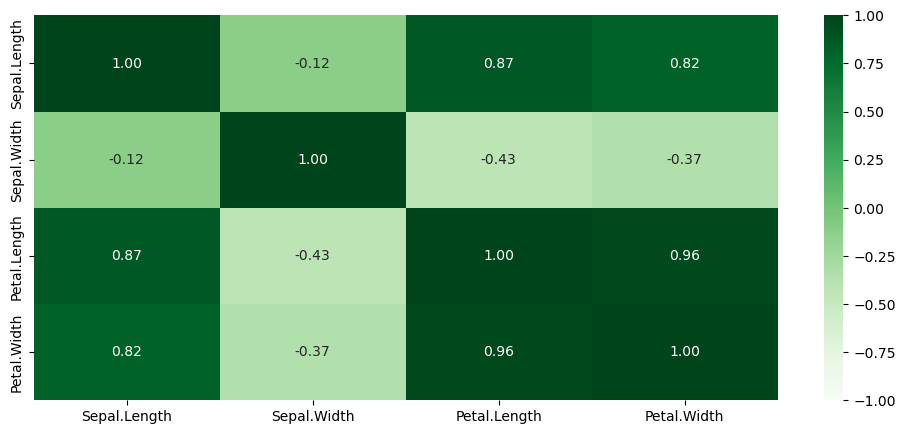

In [422]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 5))
sns.heatmap(X.corr(), vmin=-1, vmax=1, annot=True, cmap='Greens', fmt='.2f')
plt.show()